In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Wine_Quality_Data'

In [2]:
path='E:\\DataScience\\MachineLearning\\Wine_Quality_Data'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints', 'WineQT.csv', 'Wine_Quality_Analysis.ipynb']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from wordcloud import WordCloud
from scipy import signal
import scipy
#to supress warning
import warnings
warnings.filterwarnings('ignore')


#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')


In [5]:
df = pd.read_csv(path+"\\WineQT.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [8]:
#Not of use basically it tell type of alcohol
df.drop('Id',axis=1,inplace=True)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df.shape

(1143, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [12]:
df.corr().style.background_gradient(cmap = 'rocket_r')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [13]:
df.describe().T.style.background_gradient(cmap = 'rocket_r')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [14]:
df.duplicated().sum()

125

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

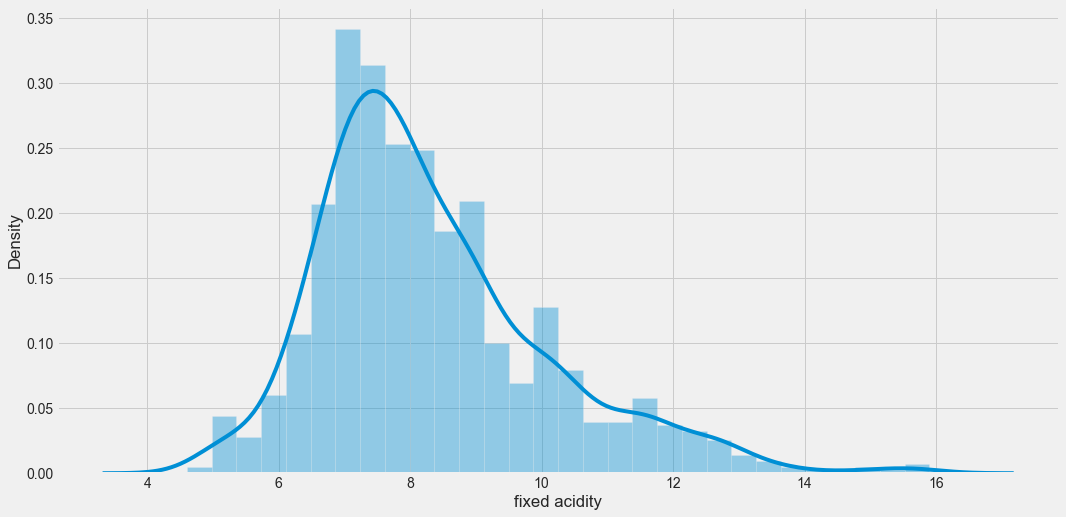

In [16]:
#center of tendency
sns.distplot(df['fixed acidity'])

In [17]:
sns.distplot

<function seaborn.distributions.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)>

In [18]:
def mix_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

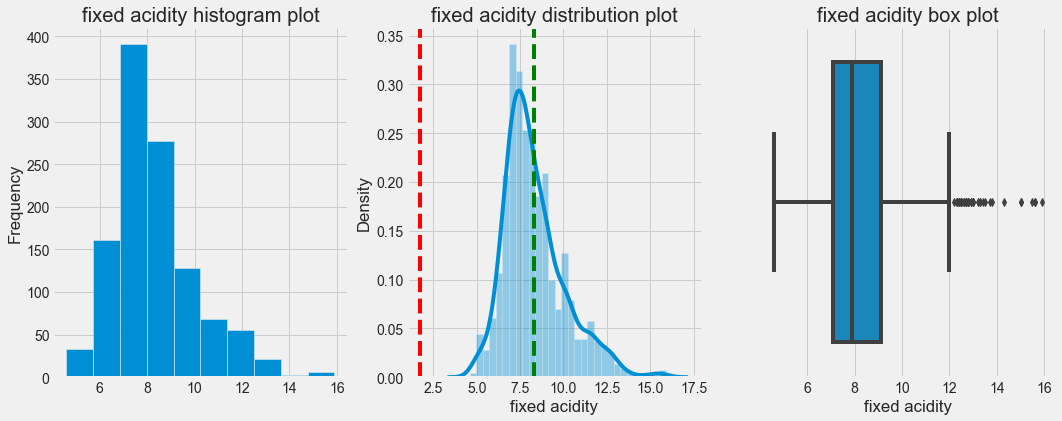

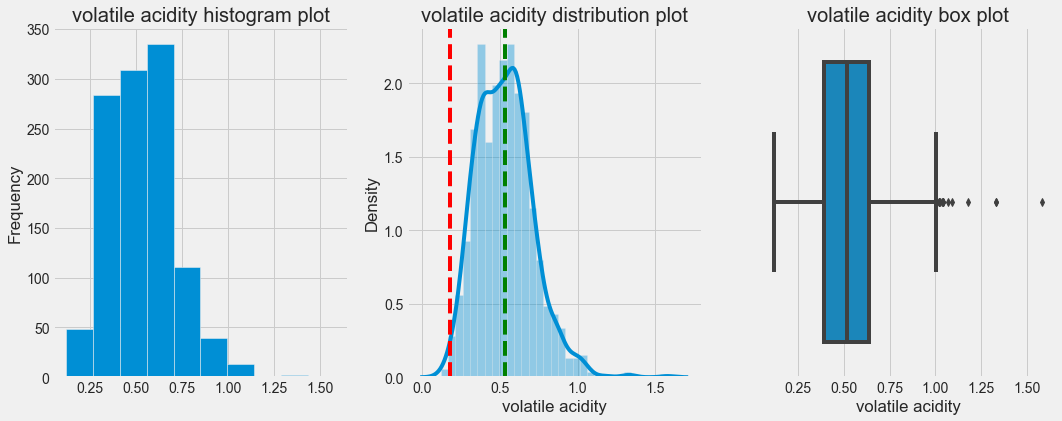

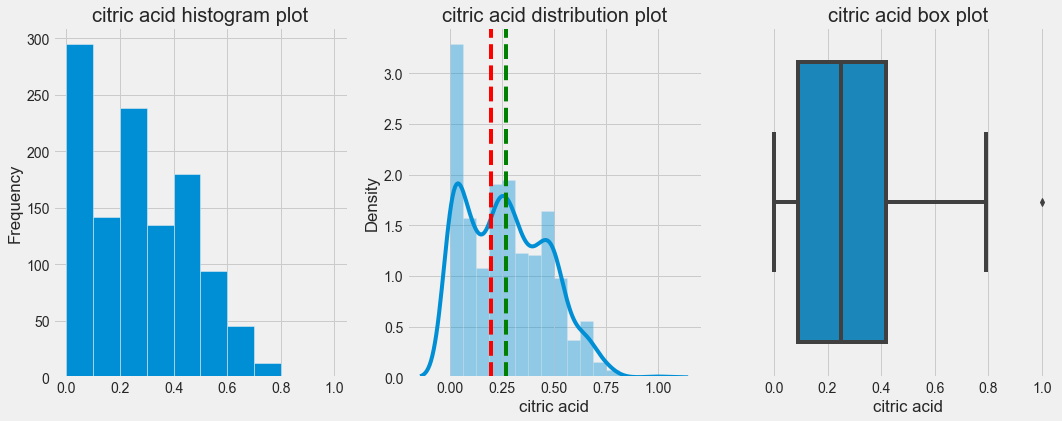

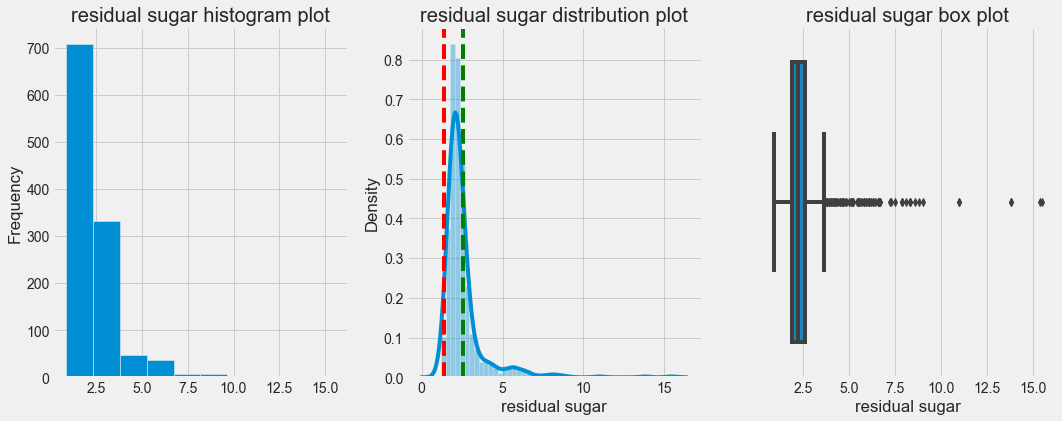

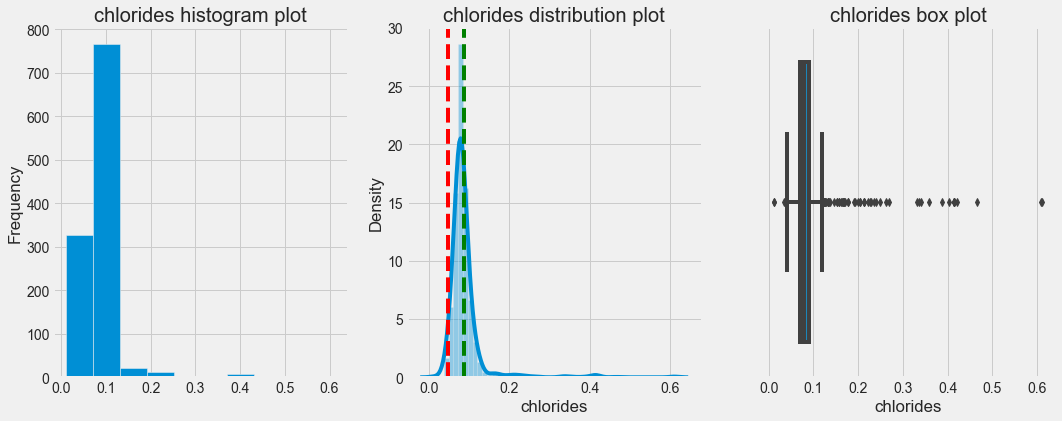

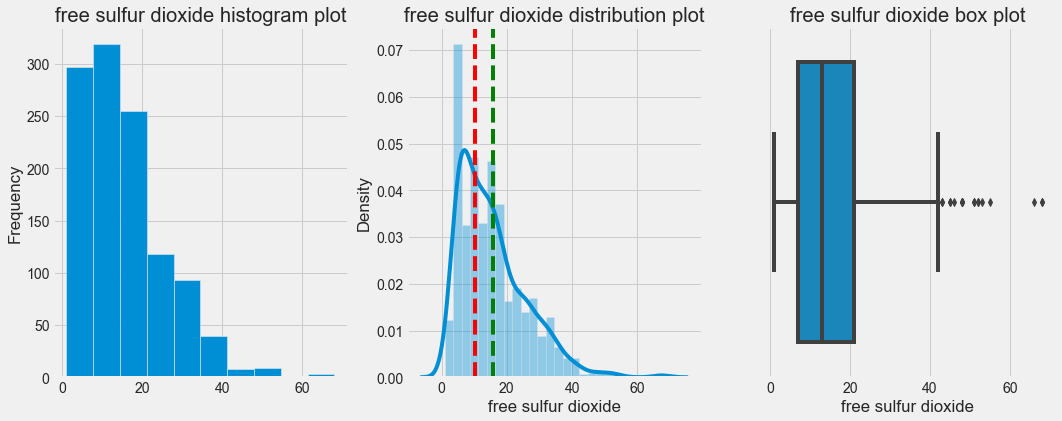

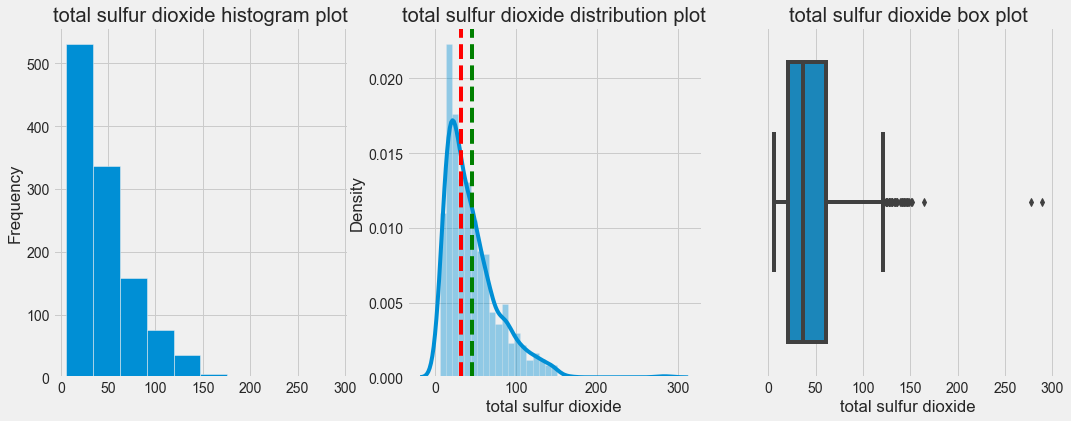

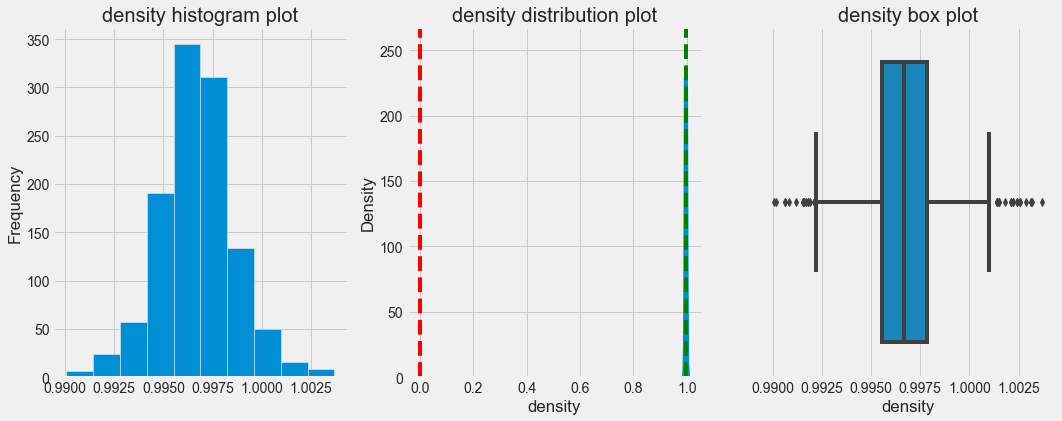

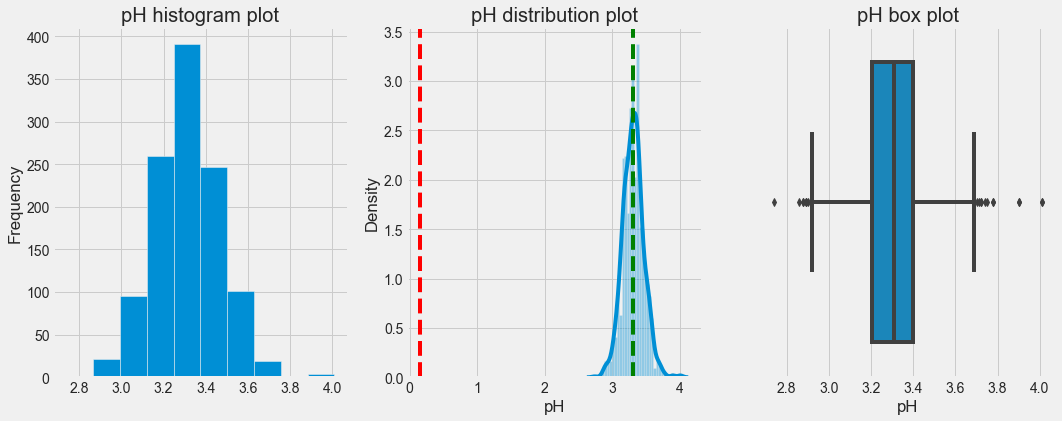

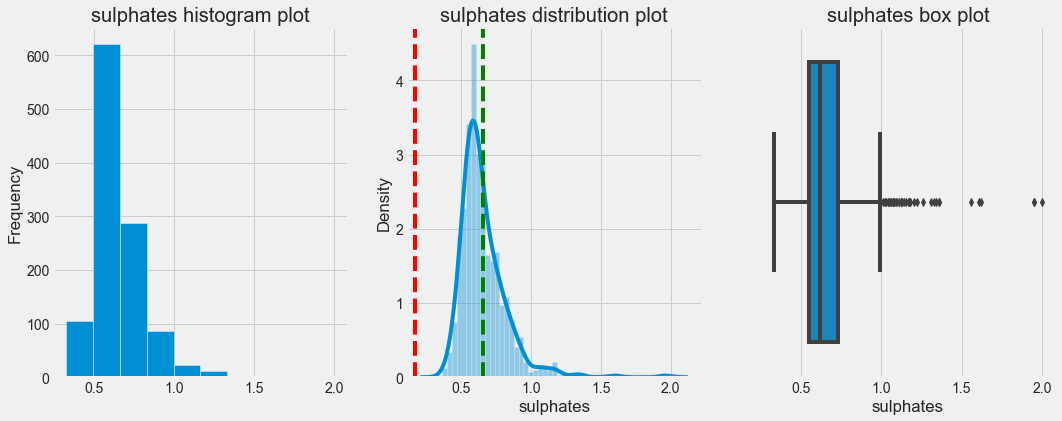

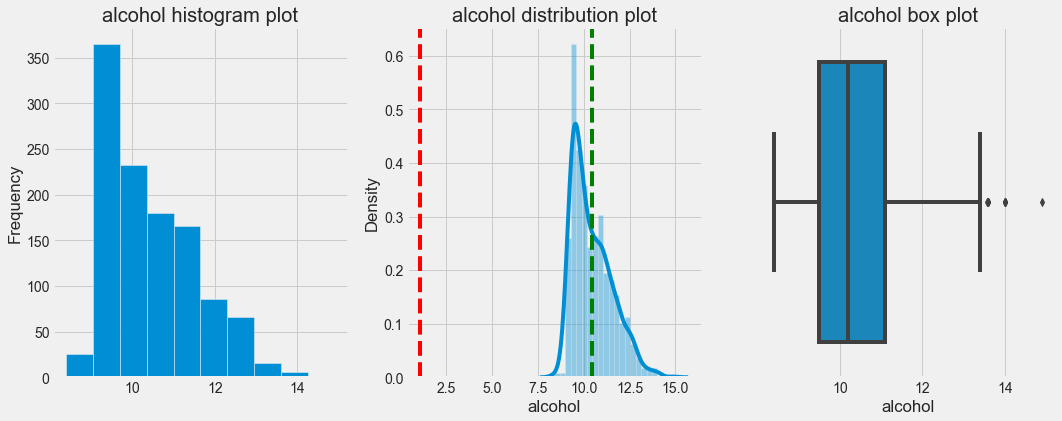

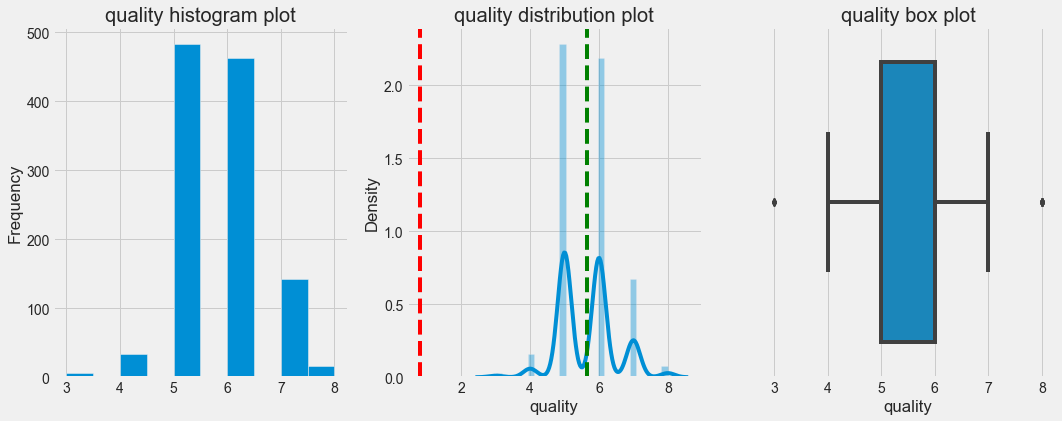

In [19]:
for i in df.columns:
    mix_plot(df[i])

In [20]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,6,6,6,6,6,6,6,6,6,6,6
4,33,33,33,33,33,33,33,33,33,33,33
5,483,483,483,483,483,483,483,483,483,483,483
6,462,462,462,462,462,462,462,462,462,462,462
7,143,143,143,143,143,143,143,143,143,143,143
8,16,16,16,16,16,16,16,16,16,16,16


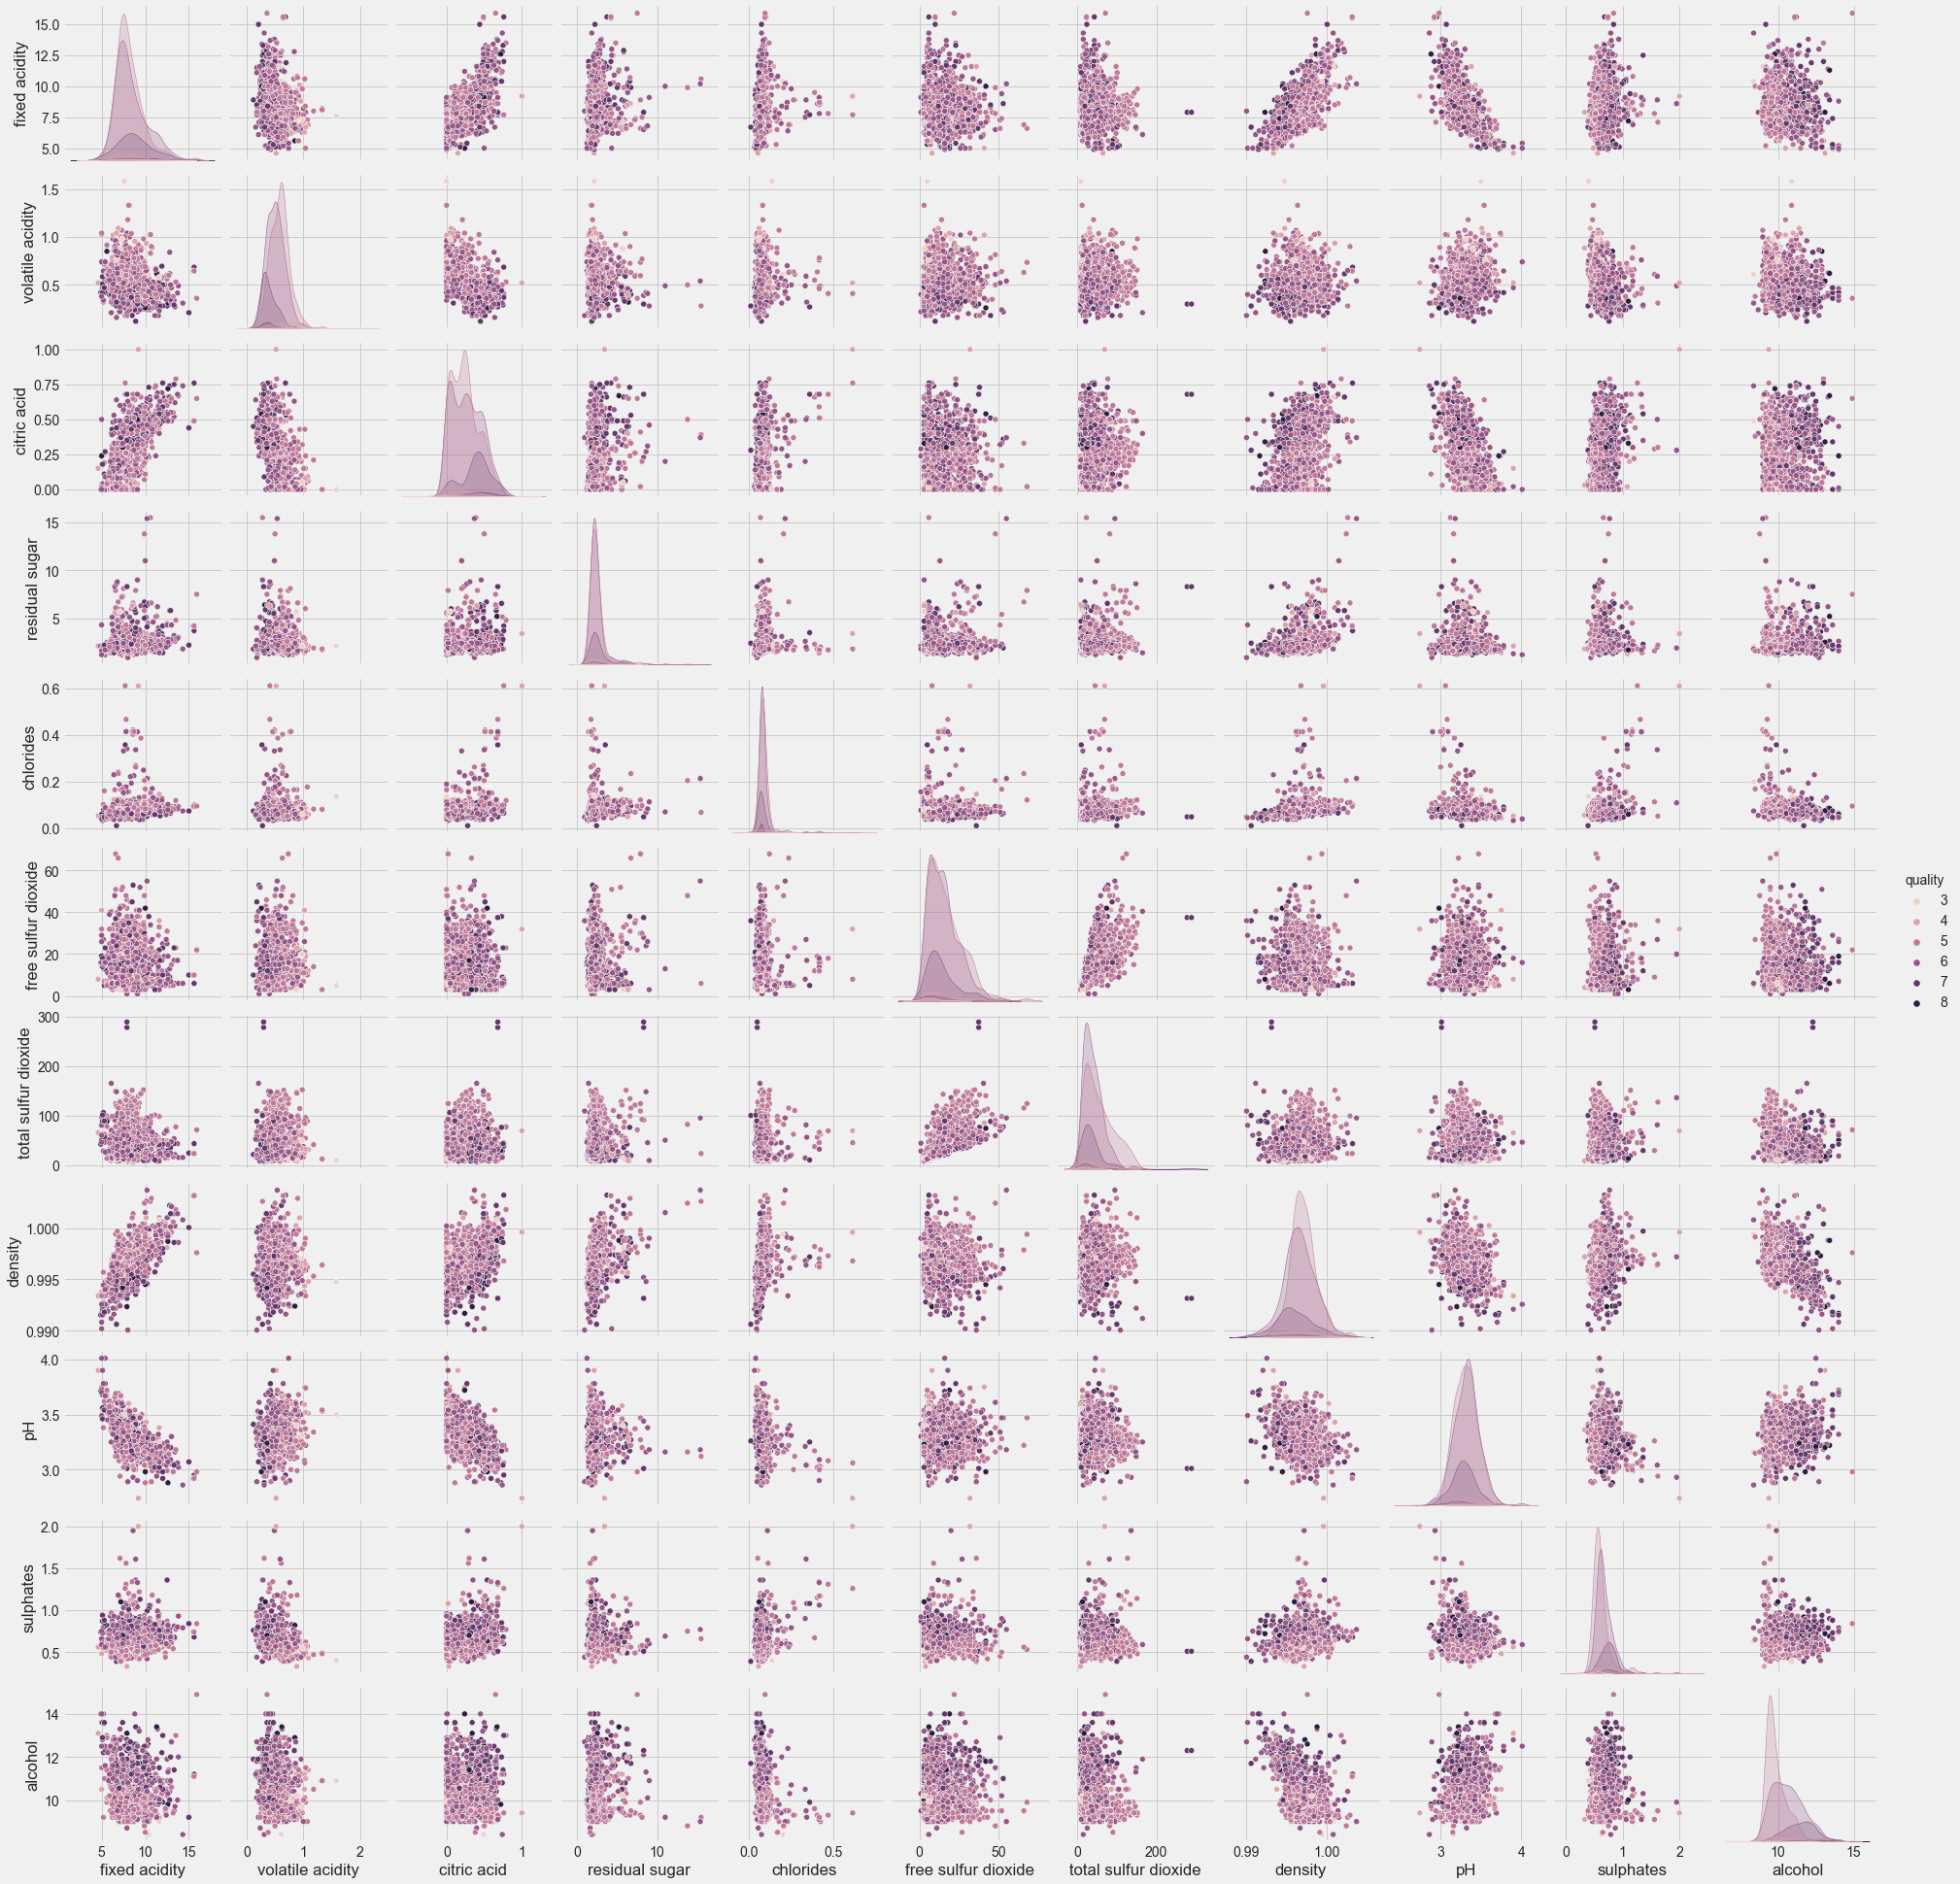

In [21]:
sns.pairplot(df,hue='quality')

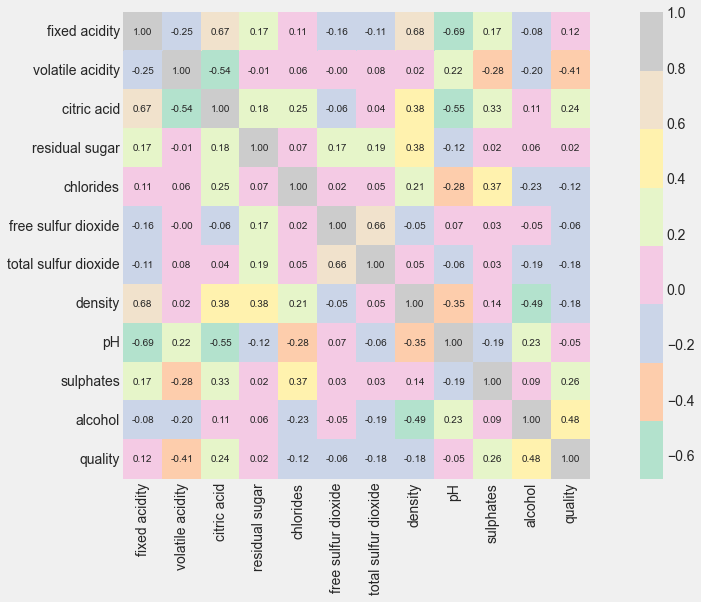

In [22]:
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Pastel2')
sns.set_style('darkgrid')

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

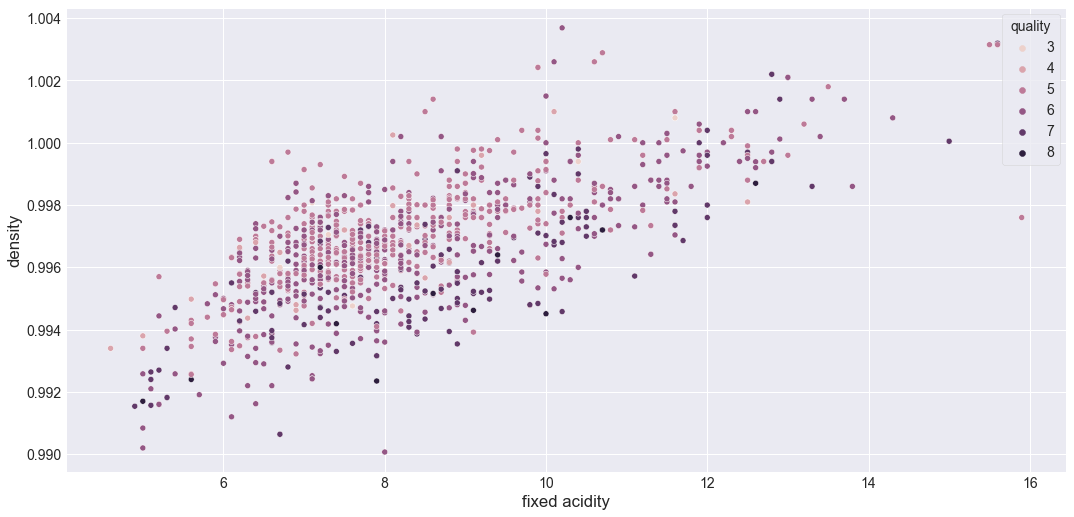

In [23]:
sns.scatterplot(data=df, x='fixed acidity', y='density',hue='quality')

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

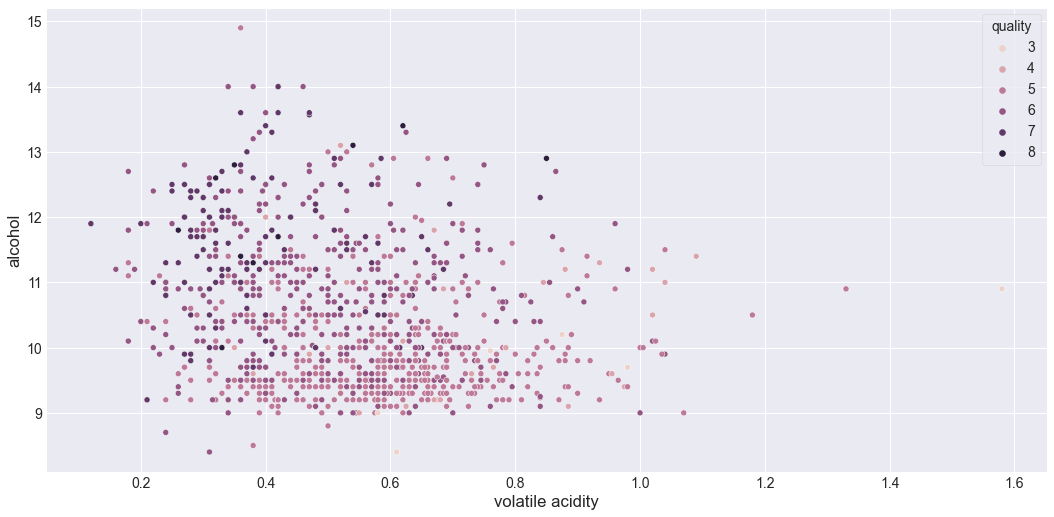

In [24]:
sns.scatterplot(data=df, x='volatile acidity', y='alcohol',hue='quality')

In [25]:
## Normalize...
df["quality"].value_counts(normalize = True)

5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: quality, dtype: float64

In [26]:
# Independent variable and dependent variable
#Independent 
X = df.loc[:, df.columns != 'quality']
#dependent
y = df[['quality']]

In [27]:
#Handel imbalace data set..
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [28]:
y.value_counts()

quality
8          483
7          483
6          483
5          483
4          483
3          483
dtype: int64

In [29]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
print("Shape X_train :",X_train.shape)
print("Shape y_train :",y_train.shape)
print("Shape X_test  :",X_test.shape)
print("Shape y_test  :",y_test.shape)

Shape X_train : (1941, 11)
Shape y_train : (1941, 1)
Shape X_test  : (957, 11)
Shape y_test  : (957, 1)


In [31]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X =Scaler.fit_transform(X)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [33]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression(random_state=2))])
pipe_Ada=Pipeline([('scaler2',StandardScaler()),
                    ('Ada',AdaBoostClassifier(learning_rate=0.1,random_state=2))])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_Xgb =Pipeline([('scaler5',StandardScaler()),
                   ('Xgboost',XGBClassifier(learning_rate=0.1,random_state=5))])


In [34]:
pipeline=[pipe_LR,pipe_Ada,pipe_DT,pipe_RF,pipe_Knn,pipe_Xgb]
pipe_dict ={0:'Lr',1:'Ada',2:'DT',3:'RF',4:'Knn',5:'Xgb'}

In [35]:
pipe_dict={0:'LogisticRegression',1:'AdaBoostClassifier',2:'DecisionTreeClassifier',3:'RandomForestClassifier'
           ,4:'KNeighborsClassifier',5:'XGBClassifier'}

In [36]:
for pipe in pipeline:
  pipe.fit(X_train,y_train)

[13:55:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.6311389759665622
AdaBoostClassifier Accuracy : 0.3949843260188088
DecisionTreeClassifier Accuracy : 0.7293625914315569
RandomForestClassifier Accuracy : 0.8432601880877743
KNeighborsClassifier Accuracy : 0.7439916405433646
XGBClassifier Accuracy : 0.8474399164054337


In [38]:
model_XGB =XGBClassifier(learning_rate=0.1,random_state=5)
model_XGB.fit(X_train,y_train)
y_pred =model_XGB.predict(X_test)

[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_mat:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.8474399164054337
Classification_report:
               precision    recall  f1-score   support

           3       0.98      0.99      0.99       156
           4       0.91      0.93      0.92       157
           5       0.75      0.73      0.74       168
           6       0.68      0.57      0.62       166
           7       0.82      0.91      0.86       159
           8       0.93      0.99      0.96       151

    accuracy                           0.85       957
   macro avg       0.84      0.85      0.85       957
weighted avg       0.84      0.85      0.84       957

Confusion_mat:
 [[155   0   1   0   0   0]
 [  0 146   6   4   0   1]
 [  2   6 122  33   5   0]
 [  1   8  34  94  25   4]
 [  0   0   0   8 144   7]
 [  0   0   0   0   1 150]]
